In [10]:
import yousef_model as model
import torch
import numpy as np
import seaborn as sns
from torch.utils.data import DataLoader
import os, sys

In [2]:
currentdir = os.path.dirname(os.path.abspath(''))
parentdir = os.path.dirname(currentdir)
grandparentdir = os.path.dirname(parentdir)
sys.path.append(grandparentdir)

from res.process_data.dataset import tensor_dataset
from res.fnn.training import training_bce
import res.process_data.process_output as pro_out
import res.fnn.functions as func

from res.fnn.training import training_bce, training_wloss
from res.process_data.dataset import tensor_dataset

/Users/dengnaicheng/Developer/intro_GANs/gansForPolymer/Naicheng/res/fnn


In [3]:
input_coorinate = np.load('../../data/coordinates.npy')
input_three_dirc = np.load('../../data/three_directions.npy')

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
z_dim = 8
lr = 0.0001
gen = model.GeneratorNet()
gen_opt = torch.optim.Adam(gen.parameters(), lr = lr)
disc = model.DiscriminatorNet()
disc_opt = torch.optim.Adam(disc.parameters(), lr = lr)

In [28]:
# check_point_gen = torch.load('6_layers/model_gan_2000.pth.tar')
# check_point_disc = torch.load('6_layers/model_disc_2000.pth.tar')
# gen.load_state_dict(check_point_gen['gen_state_dict'])
# disc.load_state_dict(check_point_disc['disc_state_dict'])

In [29]:
shuffle = True
batch_size = 125
num_worker = 0
pin_memory = True
input_tensor = torch.Tensor(input_three_dirc)
my_dataset = tensor_dataset(input_tensor, 15, 1)
my_dataloader = DataLoader(dataset= my_dataset,
                            shuffle=shuffle,
                            batch_size=batch_size,
                            num_workers=num_worker,
                            pin_memory=pin_memory)

In [30]:
display_step = 782

In [31]:
import json
# 定义一个workflow
# 每训练100次，保存模型，保存输出
# save all the loss value
loss_value_disc = {}
loss_value_gen = {}
# n_critic = 5
# clip_value = 0.01
total_epoch = 0
epoch_step = 100
for i in range(20):
    pro_out.save_model(gen, disc, '10_18/model', total_epoch)
    disc_loss, gen_loss = training_bce(gen, disc, z_dim, epoch_step, my_dataloader, device, disc_opt, gen_opt,
                 display_step)
    # training_wloss(gen, disc, my_dataloader, epoch_step, z_dim,
    #                batch_size, device, disc_opt, gen_opt, n_critic, clip_value)
    total_epoch += epoch_step
    loss_value_disc[f'epoch{total_epoch}'] = disc_loss
    loss_value_gen[f'epoch{total_epoch}'] = gen_loss
with open('10_18/gen_loss.json', 'w') as fp:
    json.dump(loss_value_gen, fp)
with open('10_18/disc_loss.json', 'w') as fp:
    json.dump(loss_value_disc, fp)

Epoch 0, step 782: Generator loss: 1.4059808135337535, discriminator loss: 0.4134144988053901
Epoch 1, step 1564: Generator loss: 2.405762578062998, discriminator loss: 0.24830167110809304
Epoch 2, step 2346: Generator loss: 2.2312922424367634, discriminator loss: 0.3312877007495717
Epoch 3, step 3128: Generator loss: 1.4153775334967995, discriminator loss: 0.49063502355000005
Epoch 4, step 3910: Generator loss: 1.2536499234264153, discriminator loss: 0.523837359703106
Epoch 5, step 4692: Generator loss: 1.1176429973233992, discriminator loss: 0.5702548841838639
Epoch 6, step 5474: Generator loss: 0.7981859130017892, discriminator loss: 0.6664964577273653
Epoch 7, step 6256: Generator loss: 0.7787990285002655, discriminator loss: 0.6428510340888179
Epoch 8, step 7038: Generator loss: 0.8534377651751188, discriminator loss: 0.6629220270516012
Epoch 9, step 7820: Generator loss: 0.7334774351485855, discriminator loss: 0.6749583493032111
Epoch 10, step 8602: Generator loss: 0.752549791656

### check the trained model

#### load trained model


In [15]:
gen_checkpoint = torch.load('10_18/model_gan_1800.pth.tar')
gen.state_dict(gen_checkpoint['gen_state_dict'])

OrderedDict([('hidden0.0.weight',
              tensor([[ 0.5588, -0.3543,  0.3087,  0.0987,  0.5758,  1.0228, -0.5618,  0.0425],
                      [-0.5802,  0.8915, -0.3308, -0.5436,  0.1775, -1.1266, -1.6543,  0.7938],
                      [ 0.1010,  0.6159, -0.4852,  1.0410,  0.5309,  1.5054, -0.1251, -0.6822],
                      [-0.4993, -0.0633, -0.1203,  0.7440,  0.0901, -0.2108,  0.2039,  0.4980],
                      [ 0.2336, -0.5848,  0.3474,  0.8358, -0.2187,  0.4302,  0.0423,  0.3286],
                      [ 0.8001, -0.4278, -0.4198, -0.7497,  0.6164, -0.0489, -0.8701,  0.4647],
                      [ 0.1986, -0.2128,  0.8022, -0.2981,  0.2539,  0.2403, -0.0220,  0.1570],
                      [-0.6238,  0.0608, -0.1271,  0.4502,  0.1394, -0.6273, -0.1011,  0.6973],
                      [ 0.2915, -0.8683,  0.4471, -0.7026, -0.9216, -0.8211,  0.9877, -0.2280],
                      [-0.2725, -0.3031,  0.4022, -0.4485, -0.3489, -0.9108,  0.3949,  0.3283],
      

In [16]:
noise = func.get_noise(10000, 8)
output = gen(noise).data.numpy()
output = output.reshape(150000)

<AxesSubplot:ylabel='Count'>

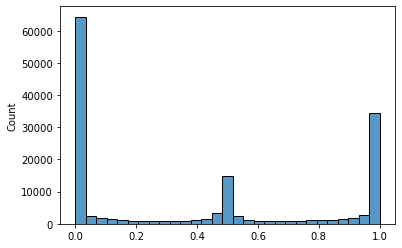

In [17]:
sns.histplot(output)
